In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = []
for i in range(int(input('Enter the range:'))):
  data.append(i**2)

Enter the range:500


In [3]:
def get_data(data,look_back=1):
  data_x = []
  data_y = []
  for i in range(len(data)-look_back):
    data_x.append(data[i])
    data_y.append(data[i+look_back])
  return np.array(data_x),np.array(data_y)

In [4]:
xtrain,ytrain = get_data(data)

In [5]:
xtrain.shape,ytrain.shape

((499,), (499,))

In [175]:
#del model

In [176]:
model = tf.keras.models.Sequential()

In [177]:
#auto-encoder model
model.add(tf.keras.layers.Input((1)))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation = 'relu'))
model.add(tf.keras.layers.Dense(16,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [178]:
model.compile('adam','mse')

In [179]:
model.fit(xtrain,ytrain,epochs = 300)

Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 13800647680.0000
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 13156246528.0000
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 12724711424.0000
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 12406902784.0000
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 12096566272.0000
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 11655165952.0000
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 10968331264.0000
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 9987672064.0000
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 8569556480.0000
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 6806635520.0000
Epoch 11/300
16/16 [==============================] - 0s 2ms/step - loss: 4695306752.0000
Epoch 12/300

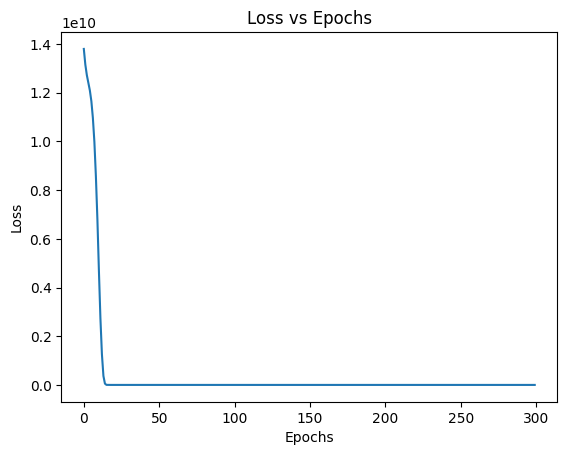

In [180]:
plt.plot(model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [181]:
ypred = model.predict(xtrain)

16/16 [==============================] - 0s 2ms/step


In [182]:
ypred = np.round(ypred)
ypred = np.squeeze(ypred).tolist()

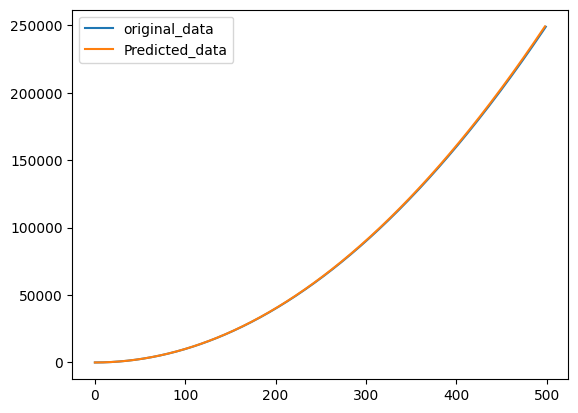

In [183]:
plt.plot(data,label = 'original_data')
plt.plot(ypred,label = 'Predicted_data')
plt.legend()
plt.show()

In [184]:
from sklearn.metrics import r2_score

In [185]:
r2_score(xtrain,ypred)

0.9999490062150033

In [ ]:
data = []
for i in range(100,int(input('Enter the range:'))+100):
  data.append(i**2)

In [187]:
yprd_test = model.predict(data)

7/7 [==============================] - 0s 3ms/step


In [188]:
r2_score(data,yprd_test)

0.999898244202878

-------------------------------------------------------

In [58]:
data = []
for i in range(int(input('Enter the range:'))):
  data.append(i/10)

Enter the range:50


In [59]:
def get_data(data,look_back=1):
  data_x = []
  data_y = []
  for i in range(len(data)-look_back):
    data_x.append(data[i])
    data_y.append(data[i+look_back])
  return np.array(data_x),np.array(data_y)

In [60]:
xtrain,ytrain = get_data(data)

In [61]:
xtrain = np.reshape(xtrain,[xtrain.shape[0],1])
ytrain = np.reshape(ytrain,[ytrain.shape[0],1])

In [63]:
#del model_l

In [64]:
model_l = tf.keras.models.Sequential()
model_l.add(tf.keras.layers.LSTM(4,input_shape = (1,1)))
model_l.add(tf.keras.layers.Dense(1))

In [65]:
model_l.compile('adam','mse')

In [66]:
model_l.fit(xtrain,ytrain, epochs = 300)

Epoch 1/300
2/2 [==============================] - 3s 8ms/step - loss: 6.4546
Epoch 2/300
2/2 [==============================] - 0s 7ms/step - loss: 6.4161
Epoch 3/300
2/2 [==============================] - 0s 7ms/step - loss: 6.3775
Epoch 4/300
2/2 [==============================] - 0s 7ms/step - loss: 6.3377
Epoch 5/300
2/2 [==============================] - 0s 8ms/step - loss: 6.2993
Epoch 6/300
2/2 [==============================] - 0s 7ms/step - loss: 6.2631
Epoch 7/300
2/2 [==============================] - 0s 7ms/step - loss: 6.2250
Epoch 8/300
2/2 [==============================] - 0s 6ms/step - loss: 6.1859
Epoch 9/300
2/2 [==============================] - 0s 6ms/step - loss: 6.1489
Epoch 10/300
2/2 [==============================] - 0s 7ms/step - loss: 6.1143
Epoch 11/300
2/2 [==============================] - 0s 7ms/step - loss: 6.0761
Epoch 12/300
2/2 [==============================] - 0s 7ms/step - loss: 6.0409
Epoch 13/300
2/2 [==============================] - 0s 6ms/st

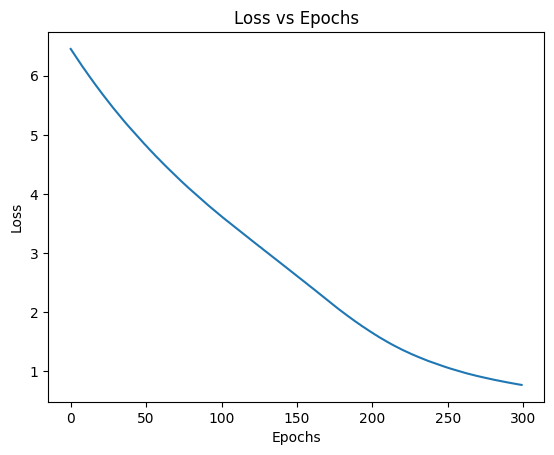

In [67]:
plt.plot(model_l.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [68]:
ypred = model_l.predict(xtrain)

2/2 [==============================] - 1s 10ms/step


In [69]:
from sklearn.metrics import r2_score
r2_score(xtrain,ypred)

0.646837919519738